# Preprocessing starts here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('Dataset_for_model_02.1.1.xlsx',header=0)

In [3]:
df.columns

Index(['cnum', 'dclosed', 'If Individual', 'dopened', 'REGISTRATION_DATE',
       'yreg', 'Groupby_date_reg', 'Region', 'perf assets', ' avg liab',
       'okved group', 'fl ul', 'payroll', 'fcy payments', 'fx', 'acquiring',
       'special finance', '%POS', '%fcy payments', '%cashin card',
       '%cashin kassa', '%input payment', '%output payment', '%exchange',
       '%cashout rba atm', '%cashout other atm', '%cashout kassa', 'count%POS',
       'count%fcy payments', 'count%cashin card', 'count%cashin kassa',
       'count%input payment', 'count%output payment', 'count%exchange',
       'count%cashout rba atm', 'count%cashout other atm',
       'count%cashout kassa'],
      dtype='object')

In [4]:
# 2 и 7 вернуть!
df = df.sample(frac=0.80, replace = False)
CNUM = df['cnum']
df_raw = df.copy()
df.drop(df.columns[[0,1,2,7,3,4,5,27,28,29,30,31,32,33,34,35,36]], axis=1, inplace=True)


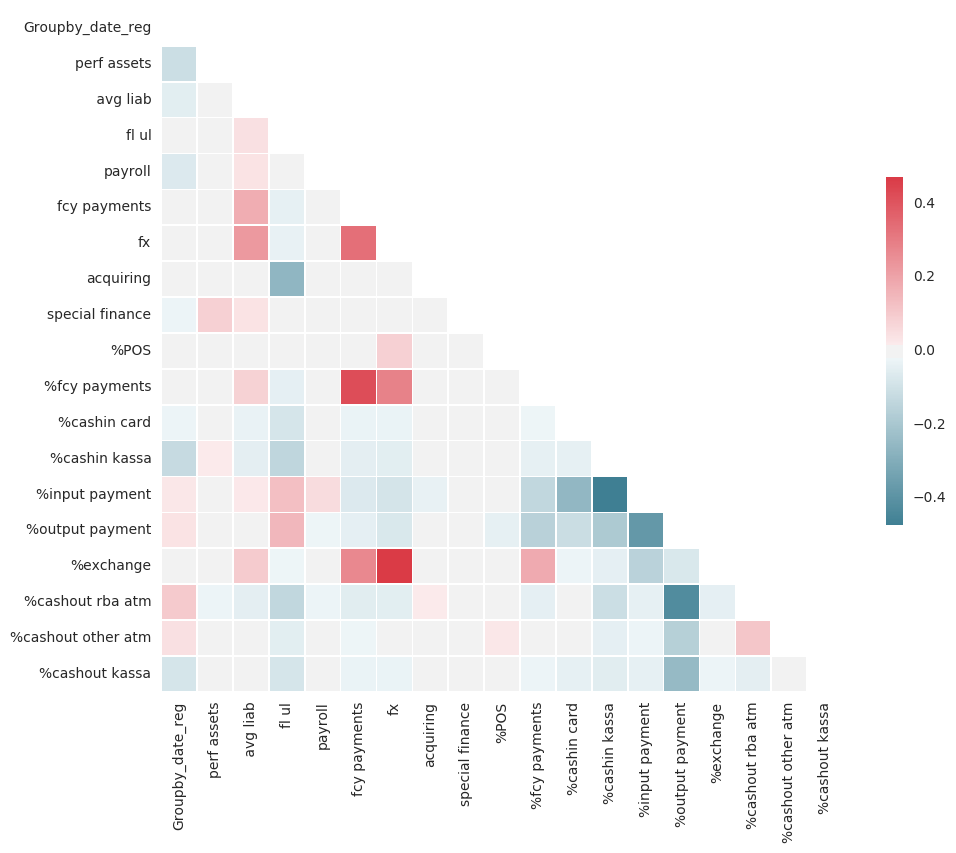

In [5]:
sns.set(style="white")
corr = df.corr()
# Верхняя часть матрицы не нужна
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
# игрища с цветом
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Аннотация с корректным цветом
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [6]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print ("Categorical columns are: ", categorical_columns)
print ("Numerical columns are: ", numerical_columns)

Categorical columns are:  ['okved group']
Numerical columns are:  ['Groupby_date_reg', 'perf assets', ' avg liab', 'fl ul', 'payroll', 'fcy payments', 'fx', 'acquiring', 'special finance', '%POS', '%fcy payments', '%cashin card', '%cashin kassa', '%input payment', '%output payment', '%exchange', '%cashout rba atm', '%cashout other atm', '%cashout kassa']


In [7]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
#df['Region'] = LE.fit_transform(df['Region'])
#df['If Individual'] = LE.fit_transform(df['If Individual'])
df['okved group'] = LE.fit_transform(df['okved group'])

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df = scale.fit_transform(df)
#X = pd.concat((df[numerical_columns], df[numerical_columns]), axis=1)

In [9]:
X = pd.DataFrame(df, dtype=float)

In [10]:
X=X.round(4)

In [53]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0000,0.0000,0.8667,0.2301,0.0000,0.2021,0.0290,0.8760,0.0,0.0007,0.0000,0.0000,0.0000,0.5045,0.0096,0.0000,0.4853,0.0000,0.0000
1,1.0,0.0000,0.0002,0.8000,0.2301,0.0000,0.2021,0.0290,0.8760,0.0,0.0000,0.0000,0.0000,0.0000,0.5124,0.4876,0.0000,0.0000,0.0000,0.0000
2,1.0,0.0000,0.0002,0.1333,0.2560,0.0000,0.2021,0.0290,0.8760,0.0,0.0000,0.0000,0.0000,0.0000,0.5025,0.4975,0.0000,0.0000,0.0000,0.0000
3,0.8,0.0000,0.0017,0.8000,0.2301,0.0000,0.2021,0.0290,0.8760,0.0,0.0000,0.0000,0.0000,0.0000,0.4873,0.5127,0.0000,0.0000,0.0000,0.0000
4,0.6,0.0000,0.0002,0.4000,0.2301,0.0000,0.2021,0.0290,0.8760,0.0,0.0000,0.0000,0.0000,0.0000,0.4404,0.5596,0.0000,0.0000,0.0000,0.0000
5,1.0,0.0000,0.0001,0.8667,0.2676,0.0000,0.2021,0.0290,0.8760,0.0,0.0000,0.0000,0.0000,0.0000,0.5020,0.4980,0.0000,0.0000,0.0000,0.0000
6,1.0,0.0000,0.0001,0.3333,0.2422,0.0000,0.2021,0.0290,0.8760,0.0,0.0000,0.0000,0.0000,0.0000,0.5043,0.4957,0.0000,0.0000,0.0000,0.0000
7,1.0,0.0000,0.0000,0.3333,0.2301,0.0000,0.2021,0.0290,0.8760,0.0,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.2,0.0000,0.0006,0.8000,0.2301,0.0000,0.2021,0.0290,0.8760,0.0,0.0000,0.0000,0.0000,0.0000,0.1855,0.2433,0.0000,0.0000,0.0000,0.5712
9,0.2,0.0000,0.0000,0.8000,0.2301,0.0000,0.2021,0.0290,0.8760,0.0,0.0000,0.0000,0.0000,0.0000,0.4930,0.0000,0.0000,0.5070,0.0000,0.0000


# Статистика Хопкинса

In [56]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 


In [62]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return (H)

In [63]:
hopkins(X)

0.98375106901096054

In [11]:
# generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method = 'ward')

In [12]:
#Считаем кофинет
#from scipy.cluster.hierarchy import cophenet
#from scipy.spatial.distance import pdist
#c, coph_dists = cophenet(Z, pdist(X))
#c
# Чем ближе с к 1, тем лучше

In [13]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


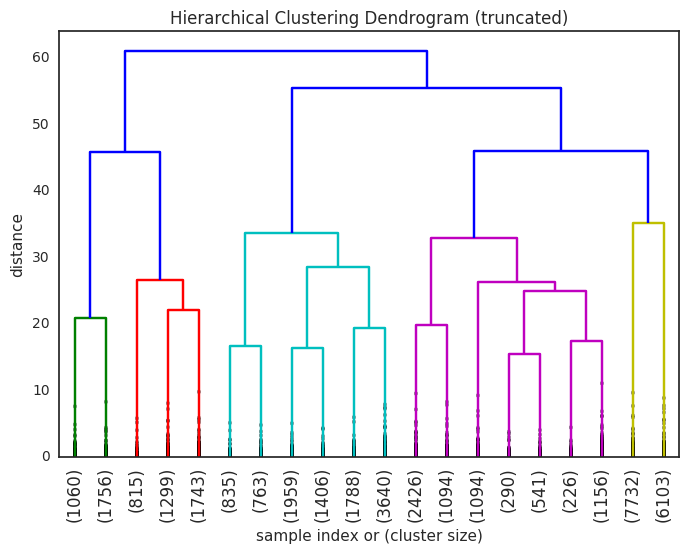

In [14]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# Retrieving clusters

In [15]:
# max_d определяет, на какой "высоте" мы срезаем дерево. 
# Пока меня нет, с этим параметром можно играться, остальной код приспособится.

In [35]:
from scipy.cluster.hierarchy import fcluster
max_d = 40
clusters = fcluster(Z, max_d, criterion='distance')
clusters



array([4, 5, 5, ..., 2, 2, 3], dtype=int32)

In [36]:
#Cluster array
a=CNUM
b=clusters
c=np.column_stack((a,b)) 
c
c2=c.transpose()


In [18]:
#Ряд кластеров в DF
#CL=pd.DataFrame(clusters, columns=["Clusters"])

In [37]:
# В CL1 лежит пара CNUM- Cluster в DF формате
CL1=pd.DataFrame(c, columns=["cnum","Clusters"])


In [38]:
writer = pd.ExcelWriter('Model_v_0.0.xlsx')
CL1.to_excel(writer, 'Sheet1')
writer.save()

In [26]:
CL1

,cnum,Clusters
0,Y66633,12
1,CAB1VP,20
2,Y54633,21
3,CAAXNQ,20
4,Z40516,11
5,Y78272,20
6,Y68009,21
7,CAB246,6
8,Y90063,15
9,Y50398,14


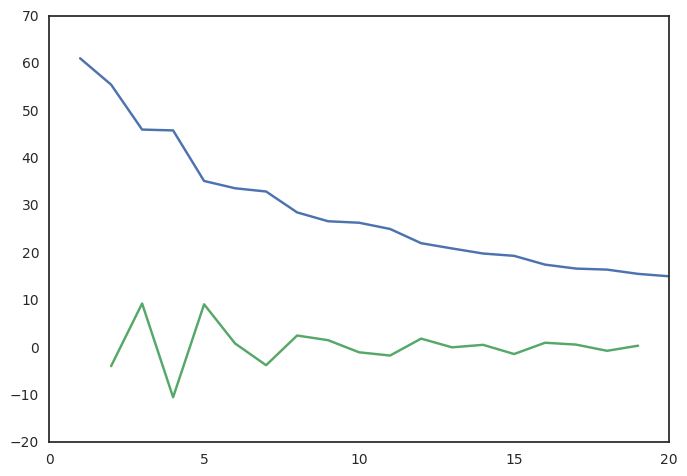

clusters: 3


In [34]:
last = Z[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

#Локтевой метод. Протестировать Пять кластеров?


In [32]:
df_final = df_raw.set_index('cnum').join(CL1.set_index('cnum'))

In [33]:
writer = pd.ExcelWriter('Model_v_0.1.xlsx')
df_final.to_excel(writer, 'Sheet1')
writer.save()